## Implement Linear Regression problem. For example, based on a dataset comprising of existing set of prices and area/size of the houses, predict the estimated price of a given house.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data1.txt', names = ["population", "profit"])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
data.insert(0, 'Ones', 1)
data

,Ones,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [4]:
cols = data.shape[1]

In [5]:
X = data.iloc[:, 0:cols - 1]  
y = data.iloc[:, cols - 1:cols]
X = np.matrix(X.values)  
y = np.matrix(y.values)

In [6]:
theta = np.matrix(np.array([0, 0]))

In [7]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [8]:
j = computeCost(X, y, theta)

In [9]:
def gradientDescent(X, y, theta, aplha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    num_parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = X * theta.T - y
        for j in range(num_parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - (alpha / len(X)) * np.sum(term)
            theta = temp
            cost[i] = computeCost(X, y, theta)
    return theta, cost

In [10]:
alpha = 0.01
iters = 2000

In [11]:
min_theta, cost = gradientDescent(X, y, theta, alpha, iters)

In [12]:
x = np.linspace(data.population.min(), data.population.max(), 100)

In [13]:
line = min_theta[0, 0] + (min_theta[0, 1] * x)

Text(0.5, 1.0, 'Predicted Profit v/s Training Data')

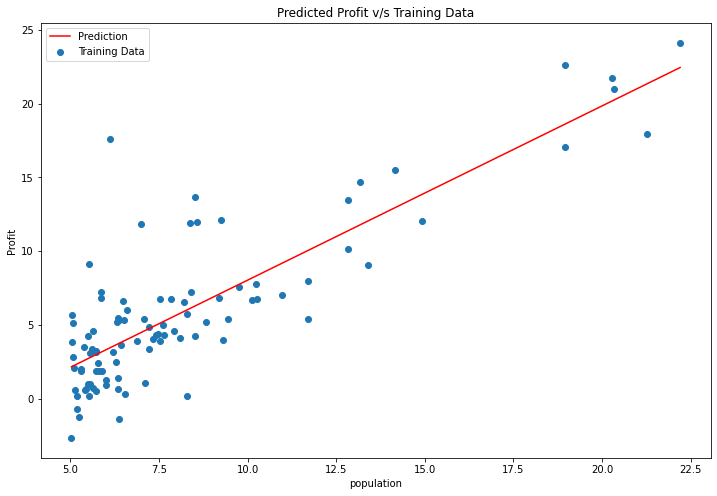

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(x, line, 'r', label = 'Prediction')
ax.scatter(data.population, data.profit, label = 'Training Data')
ax.legend(loc = 2)  
ax.set_xlabel("population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit v/s Training Data")

Text(0.5, 1.0, 'Iters v/s Cost')

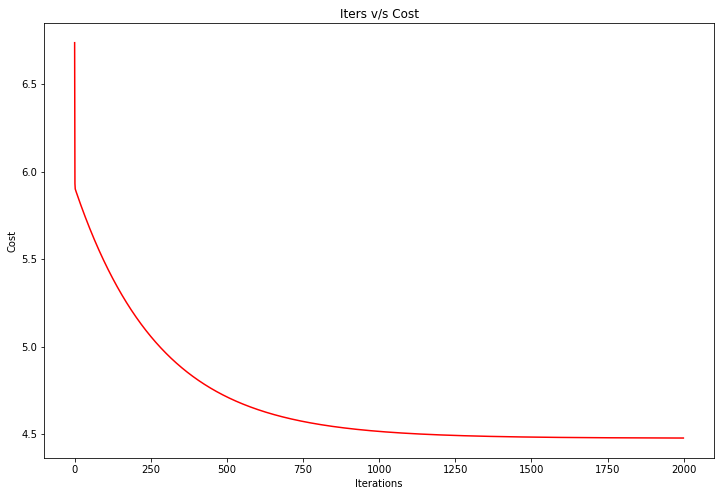

In [15]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Iters v/s Cost")